In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
from citipy import citipy
import requests
import time

In [2]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Find the nearest city for each lat and long pair
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then will add to the city list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

578

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
records_count = 1
set_count = 1

# look through all the cities in the list
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count += 1
        records_count = 1
    # create endpoint URL 
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the URL, record and set number and the city
    print(f"Processing record {records_count} of Set {set_count} | {city}")
    records_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 of Set 1 | kloulklubed
Processing record 2 of Set 1 | georgetown
Processing record 3 of Set 1 | borovsk
Processing record 4 of Set 1 | lebu
Processing record 5 of Set 1 | komsomolskiy
Processing record 6 of Set 1 | albany
Processing record 7 of Set 1 | san cristobal
Processing record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing record 9 of Set 1 | sosnovo-ozerskoye
Processing record 10 of Set 1 | clyde river
Processing record 11 of Set 1 | geraldton
Processing record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing record 13 of Set 1 | xinqing
Processing record 14 of Set 1 | new norfolk
Processing record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing record 16 of Set 1 | tasiilaq
Processing record 17 of Set 1 | mataura
Processing record 18 of Set 1 | klaksvik
Processing record 19 of Set 1 | ushuaia
Processing record 20 of Set 1 | repnoye
Processing record 

Processing record 36 of Set 4 | borogontsy
Processing record 37 of Set 4 | barrow
Processing record 38 of Set 4 | katherine
Processing record 39 of Set 4 | mount gambier
Processing record 40 of Set 4 | kutum
Processing record 41 of Set 4 | namatanai
Processing record 42 of Set 4 | bowen
Processing record 43 of Set 4 | laguna
Processing record 44 of Set 4 | karratha
Processing record 45 of Set 4 | bam
Processing record 46 of Set 4 | kanker
Processing record 47 of Set 4 | zhigansk
Processing record 48 of Set 4 | goderich
Processing record 49 of Set 4 | cidreira
Processing record 50 of Set 4 | wetaskiwin
Processing record 1 of Set 5 | ometepec
Processing record 2 of Set 5 | abalak
Processing record 3 of Set 5 | mehamn
Processing record 4 of Set 5 | linhares
Processing record 5 of Set 5 | bambous virieux
Processing record 6 of Set 5 | mnogovershinnyy
Processing record 7 of Set 5 | cayenne
Processing record 8 of Set 5 | east london
Processing record 9 of Set 5 | luang prabang
Processing rec

Processing record 29 of Set 8 | matay
Processing record 30 of Set 8 | jining
Processing record 31 of Set 8 | sao filipe
Processing record 32 of Set 8 | abiramam
Processing record 33 of Set 8 | nizhniy kuranakh
Processing record 34 of Set 8 | krasnoarmeyskoye
Processing record 35 of Set 8 | hobyo
Processing record 36 of Set 8 | tiksi
Processing record 37 of Set 8 | milingimbi
City not found. Skipping...
Processing record 38 of Set 8 | berlevag
Processing record 39 of Set 8 | coruripe
Processing record 40 of Set 8 | port-cartier
Processing record 41 of Set 8 | shache
Processing record 42 of Set 8 | harbour breton
Processing record 43 of Set 8 | erenhot
Processing record 44 of Set 8 | sovetskiy
Processing record 45 of Set 8 | bur gabo
City not found. Skipping...
Processing record 46 of Set 8 | cowra
Processing record 47 of Set 8 | kabare
Processing record 48 of Set 8 | mikhaylovsk
Processing record 49 of Set 8 | seda
Processing record 50 of Set 8 | aklavik
Processing record 1 of Set 9 | t

Processing record 19 of Set 12 | bontang
Processing record 20 of Set 12 | half moon bay
Processing record 21 of Set 12 | burica
City not found. Skipping...
Processing record 22 of Set 12 | kangaba
Processing record 23 of Set 12 | maragogi
Processing record 24 of Set 12 | novyy buh
Processing record 25 of Set 12 | ardistan
City not found. Skipping...
Processing record 26 of Set 12 | yumen
Processing record 27 of Set 12 | cockburn town
Processing record 28 of Set 12 | omboue
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
len(city_data)

534

In [9]:
# convert to DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kloulklubed,7.0419,134.2556,75.20,88,90,5.75,PW,2021-04-13 19:27:29
1,Georgetown,5.4112,100.3354,79.00,88,20,2.30,MY,2021-04-13 19:27:29
2,Borovsk,55.2064,36.4861,60.80,36,0,8.95,RU,2021-04-13 19:27:29
3,Lebu,-37.6167,-73.6500,62.40,79,87,16.15,CL,2021-04-13 19:27:30
4,Komsomolskiy,40.4272,71.7189,55.40,58,65,4.81,UZ,2021-04-13 19:27:30
5,Albany,42.6001,-73.9662,64.99,39,99,1.99,US,2021-04-13 19:27:30
6,San Cristobal,7.7669,-72.2250,98.60,28,40,17.27,VE,2021-04-13 19:27:31
7,Sosnovo-Ozerskoye,52.5249,111.5418,29.23,70,96,17.25,RU,2021-04-13 19:27:31
8,Clyde River,70.4692,-68.5914,5.00,85,75,14.97,CA,2021-04-13 19:27:31
9,Geraldton,-28.7667,114.6000,57.20,77,0,9.22,AU,2021-04-13 19:25:27


In [10]:
city_data_df = city_data_df[['City','Country', 'Date', 'Lat','Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kloulklubed,PW,2021-04-13 19:27:29,7.0419,134.2556,75.20,88,90,5.75
1,Georgetown,MY,2021-04-13 19:27:29,5.4112,100.3354,79.00,88,20,2.30
2,Borovsk,RU,2021-04-13 19:27:29,55.2064,36.4861,60.80,36,0,8.95
3,Lebu,CL,2021-04-13 19:27:30,-37.6167,-73.6500,62.40,79,87,16.15
4,Komsomolskiy,UZ,2021-04-13 19:27:30,40.4272,71.7189,55.40,58,65,4.81
5,Albany,US,2021-04-13 19:27:30,42.6001,-73.9662,64.99,39,99,1.99
6,San Cristobal,VE,2021-04-13 19:27:31,7.7669,-72.2250,98.60,28,40,17.27
7,Sosnovo-Ozerskoye,RU,2021-04-13 19:27:31,52.5249,111.5418,29.23,70,96,17.25
8,Clyde River,CA,2021-04-13 19:27:31,70.4692,-68.5914,5.00,85,75,14.97
9,Geraldton,AU,2021-04-13 19:25:27,-28.7667,114.6000,57.20,77,0,9.22


In [11]:
# create output file (CSV)
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = "City_ID")

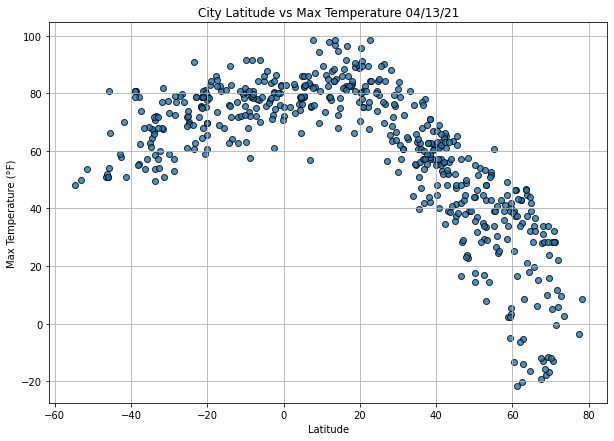

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

import time

fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(lats,max_temps,
              edgecolor='black', linewidths=1,
              marker = "o", alpha= 0.8,
              label = 'Cities')
ax.set_title("City Latitude vs Max Temperature "+ time.strftime("%x"))
ax.set_ylabel("Max Temperature (°F)")
ax.set_xlabel('Latitude')
ax.grid()
#ax[1].scatter(city_data_df['Lng'],city_data_df['Lat'])

plt.savefig("weather_data/Fig1.png")
plt.show()

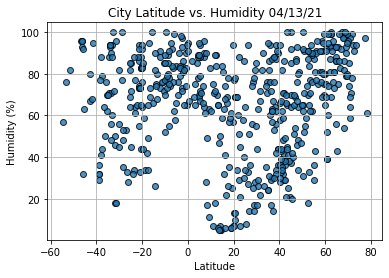

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

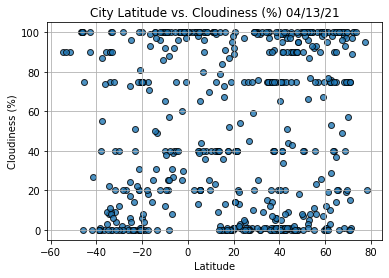

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

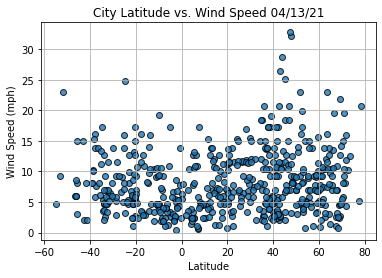

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    rcoord = (text_coordinates[0],text_coordinates[1]-10)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(f"r-value: {r_value:.3f}",rcoord,
                fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [31]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Lebu,CL,2021-04-13 19:27:30,-37.6167,-73.6500,62.40,79,87,16.15
9,Geraldton,AU,2021-04-13 19:25:27,-28.7667,114.6000,57.20,77,0,9.22
11,New Norfolk,AU,2021-04-13 19:23:41,-42.7826,147.0587,57.99,80,100,1.99
13,Mataura,NZ,2021-04-13 19:27:33,-46.1927,168.8643,51.01,96,100,5.99
15,Ushuaia,AR,2021-04-13 19:27:33,-54.8000,-68.3000,48.20,57,90,4.61


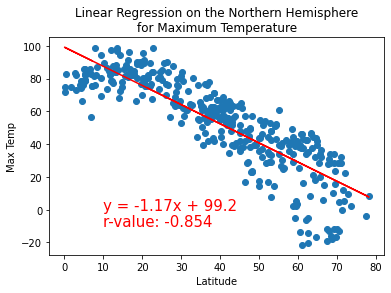

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,0))


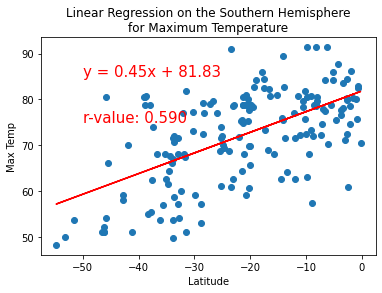

In [55]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,85))

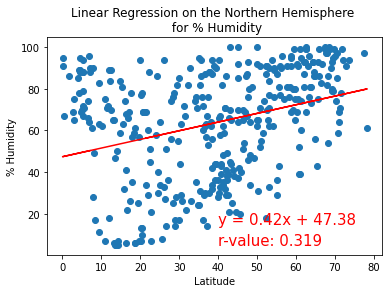

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,15))


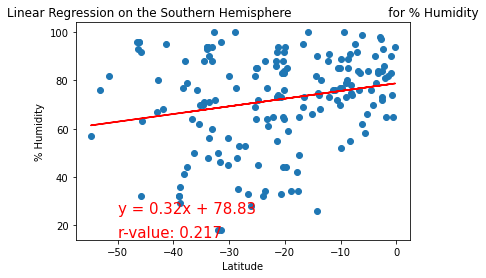

In [60]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))


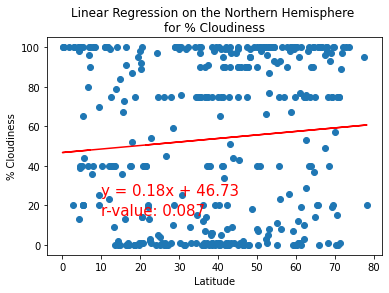

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,25))

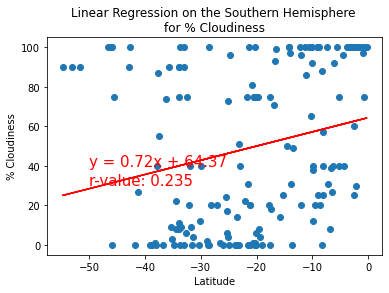

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,40))

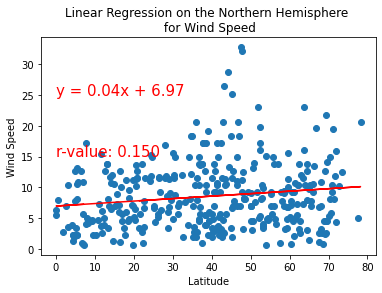

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,25))

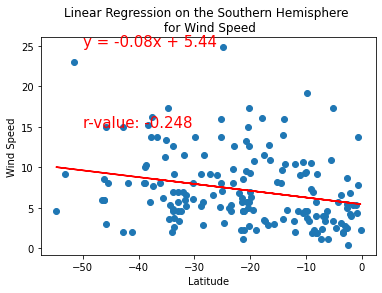

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))